In [1]:
%matplotlib ipympl

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import circmean, circvar
from matplotlib.animation import FuncAnimation

import seaborn as sns

from matplotlib import rc
import yaml
import os

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5') # conda create -n newenv -c conda-forge ffmpeg


with open("cal-settings.yml", 'r') as file:
    vars = yaml.safe_load(file)
    RX_TX_SAME_CHANNEL = vars["RX_TX_SAME_CHANNEL"]


print("Cable connections")
if RX_TX_SAME_CHANNEL:
    REF_RX_CH = FREE_TX_CH = 0
    LOOPBACK_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH0 RX\nCH1 TX-->CH1 RX\nCH0 TX -->")
else:
    LOOPBACK_RX_CH = FREE_TX_CH = 0
    REF_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH1 RX\nCH1 TX-->CH0 RX\nCH0 TX -->")


Cable connections

PLL REF-->CH0 RX
CH1 TX-->CH1 RX
CH0 TX -->


In [2]:
# data:
# 16-port splitter: "20240819131041"
# dual splitter: 20240821123542
# done with external PLL (no RF generator + splitter for 10 MHz and PPS)


timestamp = "data_T03_20240821123542"  # with 16-port splitter: "20240819131041"



res = np.load("data_T03_20240821131451_4.npy")[25000:]



res2 = np.load("data_T04_20240821131451_1.npy")[25000:]

In [3]:
print(np.rad2deg(np.angle(res)))


median_angle = np.arctan2(np.median(np.sin(np.angle(res))), np.median(np.cos(np.angle(res))))
print(np.rad2deg(median_angle))

print(np.rad2deg(np.mean(np.angle(res))))
print(np.rad2deg(circmean(np.angle(res2))))

[132.8835  132.8547  132.93391 ... 135.42493 135.22064 135.20995]
131.83653
131.55698
297.91386048234006


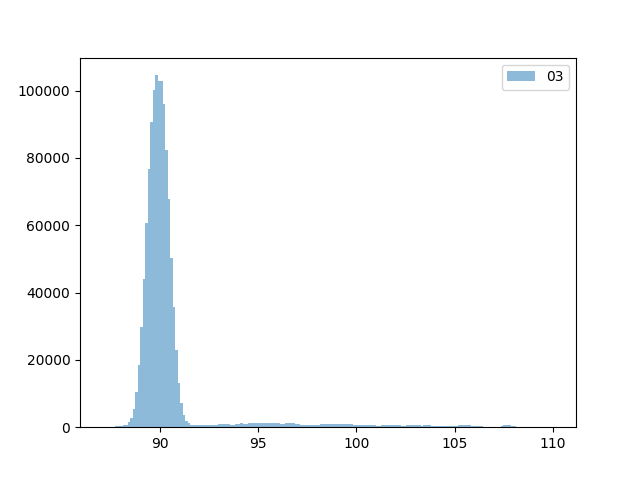

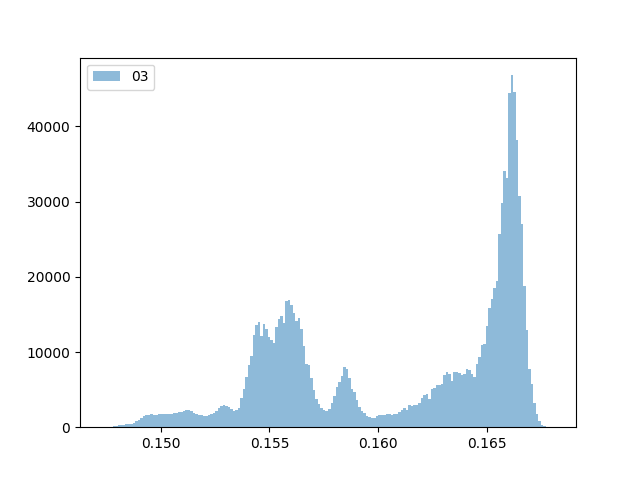

In [4]:
plt.figure()
res = np.load(f"data_T03_20240821134534_20.npy")[25000:]



bins = 180
plt.hist(


    np.rad2deg(np.angle(res)), bins=bins, label="03", alpha=0.5

)  # arguments are passed to np.histogram
plt.legend()



plt.show()

plt.figure()
bins = 180
plt.hist(
    np.abs(res), bins=bins, label="03", alpha=0.5
)  # arguments are passed to np.histogram
plt.legend()
plt.show()

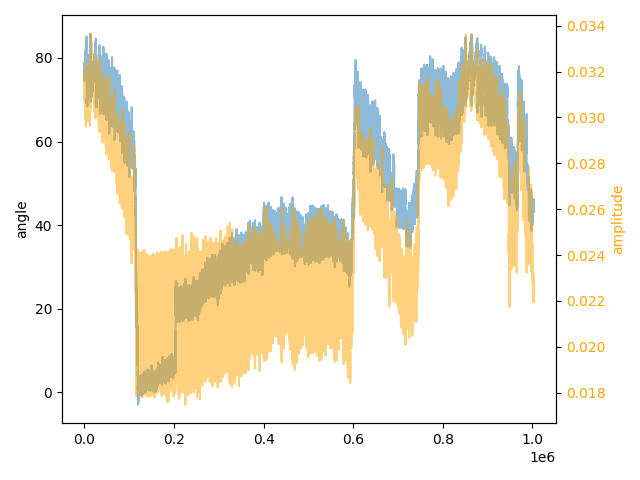

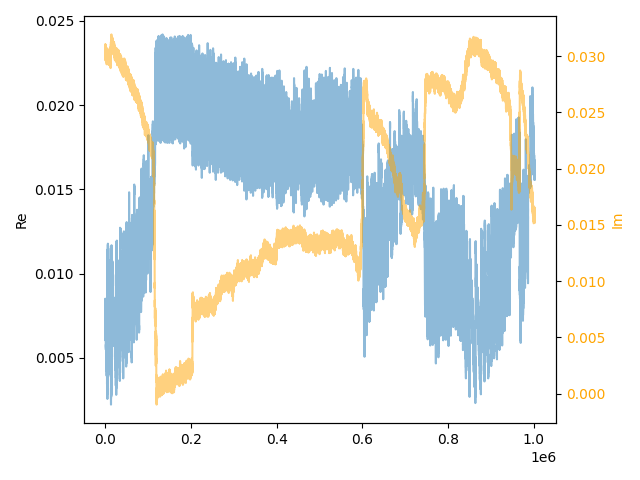

In [5]:
fig, ax1 = plt.subplots()


res = np.load(f"data_T03_20240821134534_13.npy")[250000:] # 20 = 90 degrees

ax1.set_ylabel("angle")
ax1.plot(np.rad2deg(np.angle(res)), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("amplitude", color="orange")
ax2.plot(np.abs(res), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()


fig, ax1 = plt.subplots()

ax1.set_ylabel("Re")
ax1.plot(np.real(res), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("Im", color="orange")
ax2.plot(np.imag(res), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()

38.31309637360218
42.69971


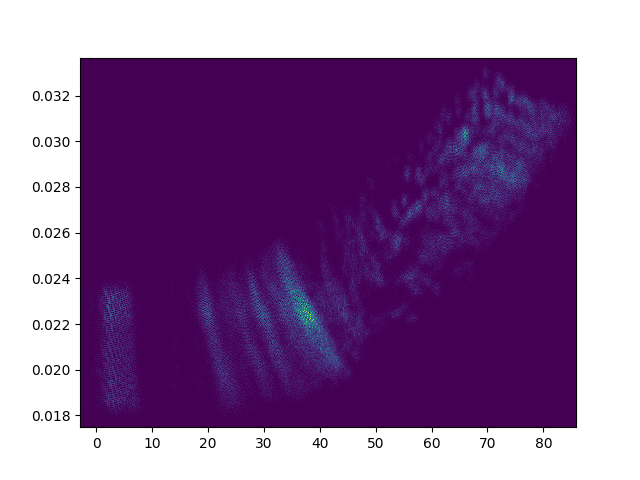

In [6]:
import numpy as np 

# res = np.load("data_T04_20240821134534_30.npy")[25000:]

valid_angles = np.angle(res);
valid_ampl = np.abs(res);


def circmedian(angs):
    return np.arctan2(np.median(np.sin(angs)), np.median(np.cos(angs)))


counts, xedges, yedges = np.histogram2d(valid_angles, valid_ampl, bins=720)
# https://stackoverflow.com/questions/60060017/how-do-i-find-the-bin-with-the-highest-count-using-np-hist2d
x_ind, y_ind = np.unravel_index(np.argmax(counts), counts.shape)
print(np.rad2deg((xedges[x_ind]+xedges[x_ind+1])/2))
print(np.rad2deg(circmedian(valid_angles)))

plt.figure()

plt.hist2d(np.rad2deg(valid_angles), valid_ampl, bins=720)
plt.show()

# x = valid_angles
# y = valid_ampl

# x_ind, y_ind = np.unravel_index(np.argmax(counts), counts.shape)
# print(f'The maximum count is {counts[x_ind][y_ind]:.0f} at index ({x_ind}, {y_ind})')
# print(f'The values are ({valid_angles[x_ind]}, {valid_ampl[y_ind]})')
# print(f'Between x values {xedges[x_ind]} and {xedges[x_ind+1]}')
# print(f'and between y values {yedges[y_ind]} and {yedges[y_ind+1]}')

# fig, ax = plt.subplots(ncols=1)

# ax.imshow(counts.T, origin='lower')
# ax.plot(x_ind, y_ind, 'or')
# ax.set_title('heatmap')

# plt.show()

In [7]:
meas = np.linspace(19,55, dtype=int)
import seaborn as sns
for i in [3,4]:
    for m in meas:
        # fig, ax = plt.subplots(tight_layout=True)
        res = np.load(f"data_T0{i}_20240821134534_{m}.npy")[25000:]
        sns.jointplot(x=np.abs(res), y=np.rad2deg(np.angle(res)), label=f"T0{i} {m}")

c:\Users\Calle\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1696: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))
